## Observations and Insights

## Dependencies and starter code

In [32]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset

mouse_data = pd.DataFrame(pd.merge(mouse_metadata,study_results,left_on = ["Mouse ID"],right_on = ["Mouse ID"]))


## Summary statistics

In [33]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

drug_group = mouse_data.groupby("Drug Regimen")

drug_stat = pd.DataFrame(drug_group["Tumor Volume (mm3)"].mean())

drug_group["Tumor Volume (mm3)"].median()

drug_stat = pd.DataFrame(pd.merge(drug_stat,drug_group["Tumor Volume (mm3)"].median(),left_on = ["Drug Regimen"],right_on = ["Drug Regimen"]))

drug_stat = drug_stat.rename(columns = {"Tumor Volume (mm3)_x":"Mean of Tumor Volume (mm3)",
                                                         "Tumor Volume (mm3)_y":"Median of Tumor Volume (mm3)" })

drug_stat = pd.DataFrame(pd.merge(drug_stat,drug_group["Tumor Volume (mm3)"].std(),left_on = ["Drug Regimen"],right_on = ["Drug Regimen"]))

drug_stat = pd.DataFrame(pd.merge(drug_stat,drug_group["Tumor Volume (mm3)"].var(),left_on = ["Drug Regimen"],right_on = ["Drug Regimen"]))

drug_stat = pd.DataFrame(drug_stat.rename(columns = {"Tumor Volume (mm3)_x":"Standard Deviation of Tumor Volume (mm3)",
                                                         "Tumor Volume (mm3)_y":"Variance of Tumor Volume (mm3)" }))

drug_stat



,Mean of Tumor Volume (mm3),Median of Tumor Volume (mm3),Standard Deviation of Tumor Volume (mm3),Variance of Tumor Volume (mm3)
Drug Regimen,,,,
Capomulin,40.675741,41.557809,4.994774,24.947764
Ceftamin,52.591172,51.776157,6.268188,39.290177
Infubinol,52.884795,51.820584,6.567243,43.128684
Ketapril,55.235638,53.698743,8.279709,68.553577
Naftisol,54.331565,52.509285,8.134708,66.173479
Placebo,54.033581,52.288934,7.821003,61.168083
Propriva,52.322552,50.854632,6.507770,42.351070
Ramicane,40.216745,40.673236,4.846308,23.486704
Stelasyn,54.233149,52.431737,7.710419,59.450562


## Bar plots

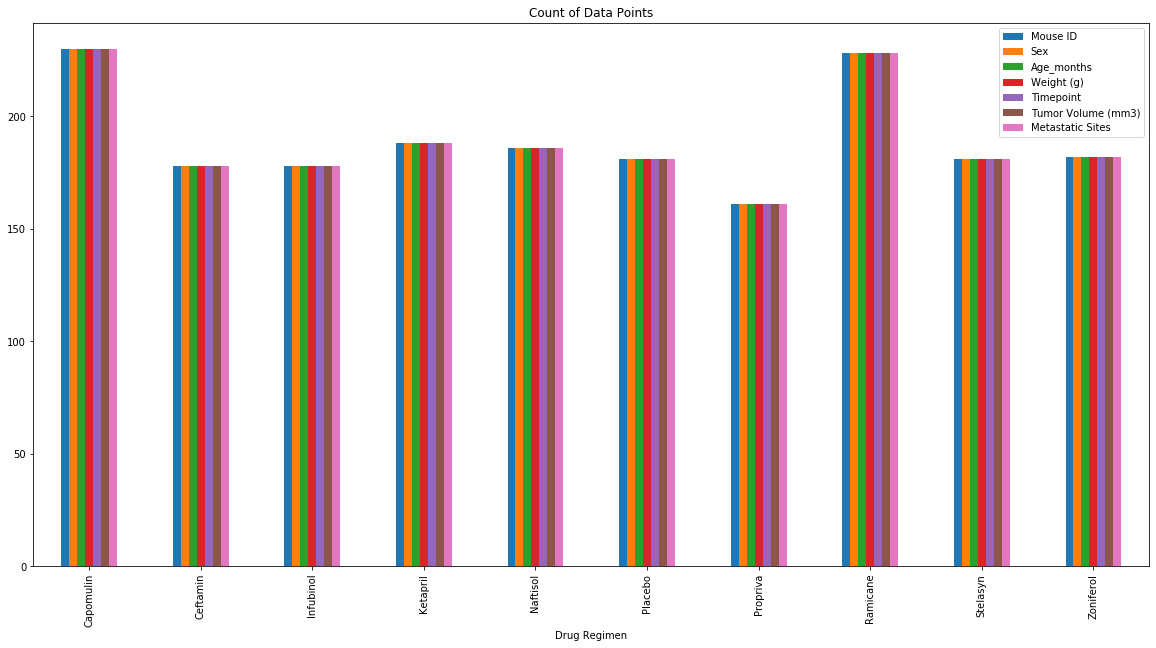

In [34]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

py_bar = pd.DataFrame(drug_group["Mouse ID"].count())

py_bar = pd.merge(py_bar,drug_group["Sex"].count(),left_on = ["Drug Regimen"],right_on = ["Drug Regimen"])

py_bar = pd.merge(py_bar,drug_group["Age_months"].count(),left_on = ["Drug Regimen"],right_on = ["Drug Regimen"])

py_bar = pd.merge(py_bar,drug_group["Weight (g)"].count(),left_on = ["Drug Regimen"],right_on = ["Drug Regimen"])

py_bar = pd.merge(py_bar,drug_group["Timepoint"].count(),left_on = ["Drug Regimen"],right_on = ["Drug Regimen"])


py_bar = pd.merge(py_bar,drug_group["Tumor Volume (mm3)"].count(),left_on = ["Drug Regimen"],right_on = ["Drug Regimen"])

py_bar= pd.merge(py_bar,drug_group["Metastatic Sites"].count(),left_on = ["Drug Regimen"],right_on = ["Drug Regimen"])

py_bar.plot.bar(figsize=(20,10),title = "Count of Data Points")



(-1, 600)

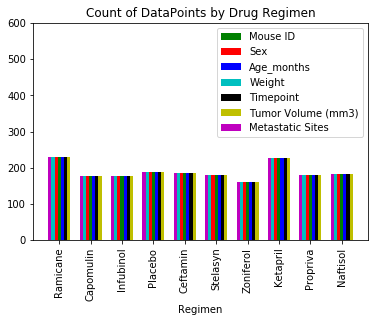

In [35]:
#Generate a bar plot showing number of data points for each treatment regimen using pyplot


x_axis = np.arange(len(mouse_data["Drug Regimen"].unique()))

             
width = 0.1


sex_count = drug_group["Sex"].count()

ID_count = drug_group["Mouse ID"].count()

Age_months_count = drug_group["Age_months"].count()

Weight_count= drug_group["Weight (g)"].count()

Timepoint_count = drug_group["Timepoint"].count()

Tumor_Volume_count = drug_group["Tumor Volume (mm3)"].count()

Metastatic_Sites_count = drug_group["Metastatic Sites"].count()




ax = plt.subplot()

axes = plt.gca()



ax.bar(x_axis,ID_count,  width, color='g', align="center",label ='Mouse ID')

ax.bar(x_axis-width,sex_count, width, color='r', align="center",label ='Sex')

ax.bar(x_axis+width,sex_count, width, color='b', align="center",label ='Age_months')

ax.bar(x_axis-width-width,Weight_count, width, color='c', align="center",label ='Weight')

ax.bar(x_axis+width+width,Timepoint_count, width, color='k', align="center",label ='Timepoint')

ax.bar(x_axis+width+width+width,Tumor_Volume_count, width, color='y', align="center",label ='Tumor Volume (mm3)')

ax.bar(x_axis-width-width-width,Metastatic_Sites_count, width, color='m', align="center",label ='Metastatic Sites')



plt.xticks(x_axis,('Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'),rotation=90)

plt.title("Count of DataPoints by Drug Regimen")

plt.xlabel("Regimen")

plt.legend(loc = 'best')

plt.autoscale()

axes.set_ylim(-1,600)



## Pie plots

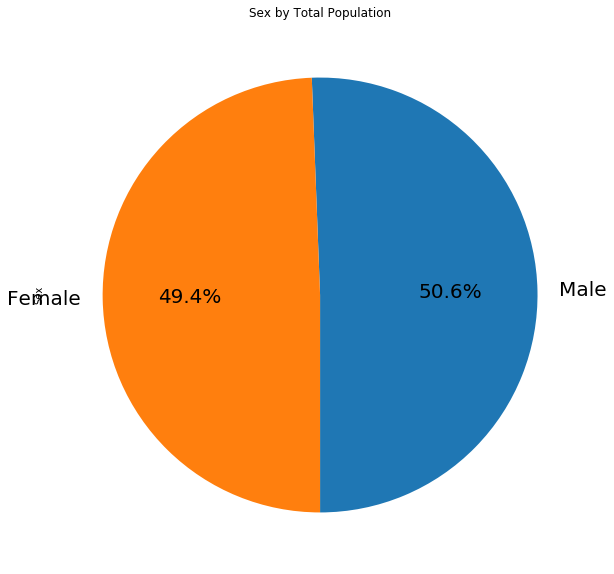

In [36]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

py_pop=mouse_data ["Sex"].value_counts()

ax = plt.subplot(111)

py_pop.plot(kind = 'pie',ax=ax,autopct= '%1.1f%%',startangle=270,fontsize=20,figsize=(10,10),title='Sex by Total Population')




([<matplotlib.patches.Wedge at 0x1dae9887e48>,
 [Text(-0.7536615388097399, -0.933806342299588, 'Male'),
  Text(0.690856410575595, 0.8559891471079556, 'Female')],
 [Text(-0.43963589763901484, -0.5447203663414263, '50.6%'),
  Text(0.3768307694048699, 0.46690317114979385, '49.4%')])

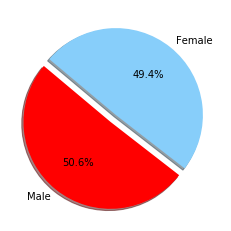

In [37]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Labels for the sections of our pie chart

labels = ['Male','Female']

colors = ["red", "lightskyblue"]

explode = (0.1, 0)

pie = plt.pie(py_pop,labels=labels,colors=colors,explode=explode,autopct= '%1.1f%%', shadow=True, startangle=140)

pie


## Quartiles, outliers and boxplots

In [52]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

top_four = ['Ceftamin','Capomulin','Ramicane','Infubinol']

top_mouse_data =[]
    
top_mouse_data = mouse_data[mouse_data['Drug Regimen'] == 'Ceftamin']

top_mouse_data = top_mouse_data.append(mouse_data[mouse_data['Drug Regimen'] == 'Capomulin'])

top_mouse_data = top_mouse_data.append(mouse_data[mouse_data['Drug Regimen'] == 'Ramicane'])

top_mouse_data = top_mouse_data.append(mouse_data[mouse_data['Drug Regimen'] == 'Infubinol'])

top_mouse = top_mouse_data.groupby('Mouse ID')

top_mouse = top_mouse['Timepoint'].max()

top_mouse = drug_stat = pd.DataFrame(pd.merge(top_mouse,top_mouse_data,left_on = ["Mouse ID","Timepoint"],right_on = ["Mouse ID","Timepoint"]))

top_mouse












,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


In [89]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and scatter plots

In [90]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [91]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [92]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen